# Setup 

In [2]:
import random,copy,time,os,csv,datetime,sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import simulations as sims
import analysis as anl
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from importlib import reload

FONT_SIZE = 20
# UNCOMMENT TO RENDER FIGURES WITH LATEX FONTS
# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['CMU Serif']})
# rc('axes', titlesize=FONT_SIZE,labelsize=FONT_SIZE)  
# plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=9) 
# rc('text', usetex=True)
# LINE_WIDTH = 2

%matplotlib inline

reload(sims)
reload(anl)

<module 'analysis' from '/Users/E/Dropbox/RESEARCH/inprogress/lineage_algorithm/code/ldp_lineage_statistics/analysis.py'>

# Running and anlzying simulations

## Simulation code usage

The file ``simulations.py`` contains the code to simulate lineages and populations trees for the various models of cell growth. Functions beginning with ``make_lineages`` will return a data frame containing the data from the simulated lineages. Each row in the data frome corresponds to a cell and there are 3 columns: ``birth_time`` stores the times when the cells are born, ``gen_time`` stores the generation times of cells and ``lineages`` stores the number of the lineage which the cell belongs to.

For example, here we are generating lineages from the random generation time model:

In [4]:
tau_avg = 1. 
cmd = 0.2
sigma_tau = 0.2
tmax = 100
sigma = sigma_tau*np.sqrt(1-cmd**2)
df = sims.make_lineages_rgt(tmax,tau_avg,cmd,sigma,3)
lineages = df.lineage.unique()

In order to plot the generation times we do the following:

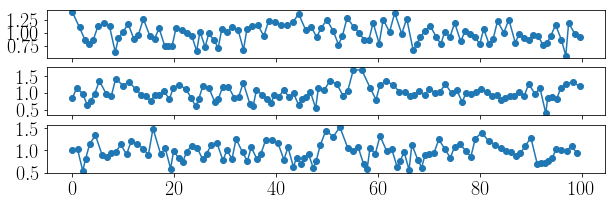

In [5]:
fig,axs = plt.subplots(nrows=len(lineages),figsize=(10,3),sharex=True)
for k in lineages:
    ax = axs[k]
    ax.plot(df.birth_time[df.lineage==k],df.gen_time[df.lineage==k],'o-')

## Simulation analysis

The analysis functions are contained in the file ``analysis.py``. The most important function is ``lineage_fitness`` which returns the estimate of the population growth rate from the lineage representation. For example:

In [4]:
anl.lineage_fitness(df)

0.7030390552814845

# Agreement between lineage representation and theory

Fig 1. shows agreement between the lineage algorithm and the theory for the random generation time model. In this case we have an explicit formula for the population growth rate.

The data for the figure is generated by the file ``generate_fig1_data.py``.

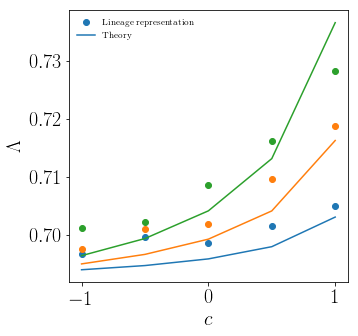

In [8]:
path = os.getcwd()+'/figure_data/fig2'
L_sig010_alg = np.loadtxt(path+'/fitness_alg_sigma0.1.txt',delimiter = ' ')
L_sig010_true = np.loadtxt(path+'/fitness_true_sigma0.1.txt',delimiter = ' ')

L_sig015_alg = np.loadtxt(path+'/fitness_alg_sigma0.15.txt',delimiter = ' ')
L_sig015_true = np.loadtxt(path+'/fitness_true_sigma0.15.txt',delimiter = ' ')

L_sig02_alg = np.loadtxt(path+'/fitness_alg_sigma0.2.txt',delimiter = ' ')
L_sig02_true = np.loadtxt(path+'/fitness_true_sigma0.2.txt',delimiter = ' ')


cmd_range = np.linspace(-1,1,len(L_sig010_alg))

fig,ax = plt.subplots(1,figsize=(5, 5))
ax.plot(cmd_range,L_sig010_alg,'C0o',label=r'Lineage representation')
ax.plot(cmd_range,L_sig010_true,'C0-',label=r'Theory')

ax.plot(cmd_range,L_sig015_alg,'C1o')
ax.plot(cmd_range,L_sig015_true,'C1-')

ax.plot(cmd_range,L_sig02_alg,'C2o')
ax.plot(cmd_range,L_sig02_true,'C2-')
ax.set_xlabel(r'$c$')
ax.set_ylabel(r'$\Lambda$')

ax.legend(frameon=False)


# Convergence of lineage algorithm 

Here we plot, for a single choice of paramater values, the error between the lineage algorithm and the true population growth rate for different values of $T$, the length of the lineages, and $M$, the duration of the lineages.

The data is generated by the file ``generate_fig2_data.py``.

0.04938271604938272


/Users/E/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


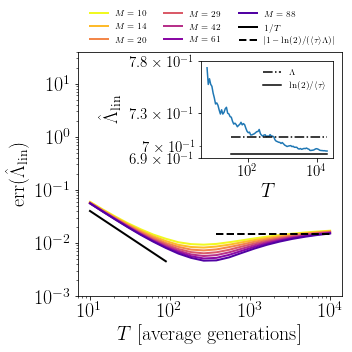

In [10]:
path = './figure_data/fig3'
Err_lin = np.loadtxt(path+'/Err_lin.txt',delimiter = ' ')
T_range = np.loadtxt(path+'/t_range.txt',delimiter = ' ')
M_range = np.loadtxt(path+'/M_range.txt',delimiter = ' ')

fig,ax = plt.subplots(1,figsize=(5, 5))
ALPHA = 1.
plt.subplots_adjust(hspace=0.5)
colors= plt.get_cmap('plasma').colors

# make left subplot

# for each M plot the error as a function of T
[ax.loglog(T_range,Err_lin[:,k],'-',\
           markeredgewidth=1,
           color=colors[int(len(colors)-1-k/len(M_range)*len(colors))],\
           alpha=ALPHA,\
           label=r'$M = %i$'%M_range[k],\
           linewidth=LINE_WIDTH) for k in range(0,len(M_range))]

# plot theory
ax.loglog(T_range[:7],0.4/T_range[:7],\
           '-',\
           color='k',\
           label=r'$1/T$',\
           linewidth = LINE_WIDTH)

#lim = np.log(2)**2*0.2**2/(1-0.2**2)
tau_avg = 1. 
cmd = 0.2
sigma_tau=0.2
L_true = 2*np.log(2.)/tau_avg/(1.+np.sqrt(1.-2.*np.log(2.)*sigma_tau**2/tau_avg*(1+cmd)/(1-cmd)))
lim = abs(L_true-np.log(2))
#lim = np.log(2)**2*0.2**2/(1-0.2**2)/2
ax.loglog(T_range[10:],lim*np.ones(len(T_range[10:])),\
           '--',\
           color='k',\
           label=r'$|1- \ln(2)/(\langle \tau \rangle \Lambda)|$',\
           linewidth = LINE_WIDTH)

#plt.axvspan(200,233, facecolor='0.2', alpha=0.2)

ax.set_ylabel(r'${\rm err}(\hat{\Lambda}_{\rm lin})$')
ax.set_xlabel(r'$T$ [average generations]')

ax.legend(loc='lower left', bbox_to_anchor= (0.03, 1.01), ncol=3, 
            borderaxespad=0, frameon=False)
ax.set_ylim([10.**-3,40])
print(0.2**2/(1-0.1)**2)


#Make inset showing single trajectory
path = "./figure_data/fig3/Llin_vs_T2"
T_range= np.loadtxt(path+"/t_range.txt",delimiter = ' ')
fitt= np.loadtxt(path+"/fitt.txt",delimiter = ' ')


axins = inset_axes(ax, width="50%", height="40%",loc=1, borderpad=1)
axins.loglog(T_range,fitt,'-',r"Simulation")
axins.loglog(T_range[20:],L_true*np.ones(len(T_range[20:])),'-.',label = r"$\Lambda$",color='k')
axins.loglog(T_range[20:],np.log(2)*np.ones(len(T_range[20:])),'-',color = 'k',label = r"$\ln(2)/\langle \tau \rangle$")
axins.legend(loc='upper right',frameon=False)
axins.set_xlabel(r"$T$")
axins.set_ylabel(r"$\hat{\Lambda}_{\rm lin}$")
axins.tick_params(axis='both',which='both',labelsize=15)

ymin, ymax = axins.get_ylim()
axins.set_yticks(np.round(np.linspace(ymin, ymax, 3),2))
axins.set_yticks(np.round(np.linspace(ymin, ymax, 3),2))
plt.tight_layout()
plt.savefig('./fig3.pdf')

## Cell-size regulation model

In Fig S3 of the supplemental material we show the same figure using the cell-size regulation model. 

The data is generated by the file ``generate_figS3_data.py``.

In [12]:
path = os.getcwd()+'/figure_data/figS3/'
Err_lin = np.loadtxt(path+'/Err_lin.txt',delimiter = ' ')
#Err_gt = np.loadtxt(path+'/Err_gt.txt',delimiter = ' ')
T_range = np.loadtxt(path+'/T_range.txt',delimiter = ' ')
M_range = np.loadtxt(path+'/M_range.txt',delimiter = ' ')

0.04938271604938272


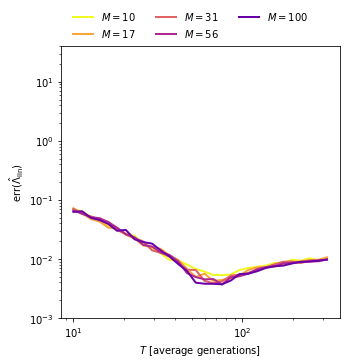

In [13]:
#path = os.getcwd()+'/output/convergence_data/from_trevor'



fig,ax = plt.subplots(1,figsize=(5, 5))
ALPHA = 1.
plt.subplots_adjust(hspace=0.5)
colors= plt.get_cmap('plasma').colors

# make left subplot

# for each M plot the error as a function of T
[ax.loglog(T_range,Err_lin[:,k],'-',\
           markeredgewidth=1,
           color=colors[int(len(colors)-1-k/len(M_range)*len(colors))],\
           alpha=ALPHA,\
           label=r'$M = %i$'%M_range[k],\
           linewidth=LINE_WIDTH) for k in range(0,len(M_range))]

# plot theory
# ax.loglog(T_range[:7],0.4/T_range[:7],\
#            '-',\
#            color='k',\
#            label=r'$1/T$',\
#            linewidth = LINE_WIDTH)


tau_avg = 1. 
cmd = 0.2
sigma_tau=0.2
L_true = 2*np.log(2.)/tau_avg/(1.+np.sqrt(1.-2.*np.log(2.)*sigma_tau**2/tau_avg*(1+cmd)/(1-cmd)))
lim = abs(L_true-np.log(2))

# ax.loglog(T_range[10:],lim*np.ones(len(T_range[10:])),\
#            '--',\
#            color='k',\
#            label=r'$\ln(2)^2/(2I^{\prime\prime}(\langle \gamma \rangle_p))$',\
#            linewidth = LINE_WIDTH)

#plt.axvspan(200,233, facecolor='0.2', alpha=0.2)

ax.set_ylabel(r'${\rm err}(\hat{\Lambda}_{\rm lin})$')
ax.set_xlabel(r'$T$ [average generations]')

ax.legend(loc='lower left', bbox_to_anchor= (0.03, 1.01), ncol=3, 
            borderaxespad=0, frameon=False)
ax.set_ylim([10.**-3,40])
print(0.2**2/(1-0.1)**2)

## Check CV of $2^n$

In Fig S2 we plot the variance of gamma which appears in the error of the lineage lineage representation. 

The data is generated by ``generate_figS2_data.py``

In [14]:
path = os.getcwd()+'/figure_data/figS2'
T_range = np.loadtxt(path+'/t_range.txt',delimiter = ' ')
gam = np.loadtxt(path+'/gam.txt',delimiter = ' ')
var_2gam = np.loadtxt(path+'/var_2gam.txt',delimiter = ' ')
mean_2gam = np.loadtxt(path+'/mean_2gam.txt',delimiter = ' ')

In [15]:
gam_mean = np.array([np.mean(g) for g in gam])
gam_var = np.array([np.var(g) for g in gam])
N_mean= np.array([np.mean([2**(g*T) for g in gams]) for T,gams in zip(T_range,gam)])
N_var= np.array([np.var([2**(g*T) for g in gams]) for T,gams in zip(T_range,gam)])

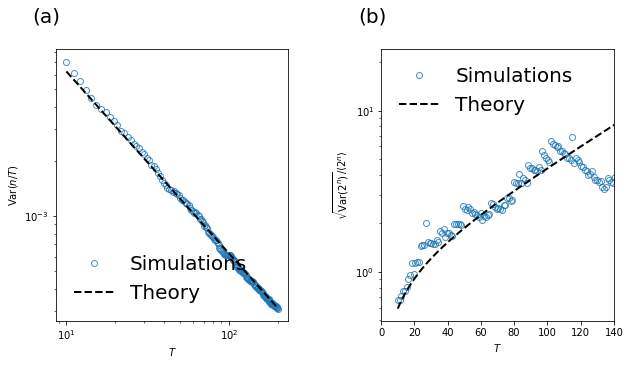

In [16]:
tau_avg = 1. # average generation time
sigma_tau = 0.2 # variance in generation time
cmd = 0.2  # mother daughter correlations
Ic = ((cmd-1)**2*tau_avg**3)/sigma_tau**2

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
plt.subplots_adjust(hspace=5)
ax1.loglog(T_range,gam_var,'o',linewidth=LINE_WIDTH,alpha=0.8,fillstyle='none',label=r'Simulations')
ax1.loglog(T_range,1./(T_range*Ic),'--',color='k',linewidth=LINE_WIDTH,label=r'Theory')
ax1.set_xlabel(r'$T$')
ax1.set_ylabel(r'${\rm Var}(n/T)$')
ax1.legend(loc='lower left',frameon=False,fontsize=20)
ax1.annotate('(a)', xy=(-0.1, 1.1), xycoords="axes fraction",fontsize=20)


theory = np.sqrt(np.exp(T_range*np.log(2)**2/(Ic))-1)
ax2.semilogy(T_range,np.sqrt(var_2gam/mean_2gam**2),'o',fillstyle='none',linewidth=LINE_WIDTH,alpha=0.8,\
          label=  r'Simulations')
ax2.semilogy(T_range,theory,'--',color='k',linewidth=LINE_WIDTH,label = r'Theory')
ax2.set_xlabel(r'$T$')
ax2.set_ylabel(r'$\sqrt{{\rm Var}(2^{n})}/\langle 2^{n}\rangle$')
ax2.set_xlim([10**-1,140])
ax2.legend(loc='upper left',frameon=False,fontsize=20)
ax2.annotate('(b)', xy=(-0.1, 1.1), xycoords="axes fraction",fontsize=20)

fig.subplots_adjust(wspace=0.4,hspace=1.)

# Demographic fluctuations

In Fig S1 we study the demographic fluctuations of the total number of cells in a exponentially growing population. This is used to justify our definition of fitness. 

The data is generated by ``generate_figS1_data.py``.

In [17]:
data_directory = os.getcwd()+'/figure_data/figS1'
N = []
T = []
n_samples = 100
for k in range(n_samples):
     N.append(np.loadtxt(data_directory+'/N%i.txt'%k,delimiter = ' '))
     T.append(np.loadtxt(data_directory+'/T%i.txt'%k,delimiter = ' '))
N = np.array(N)
T = np.array(T)

In [18]:
var_lnN = np.array([np.var(np.log(N[:,k])) for k in range(len(N[0]))])
var_N = np.array([np.var(N[:,k]) for k in range(len(N[0]))])
mean_N = np.array([np.mean(N[:,k]) for k in range(len(N[0]))])

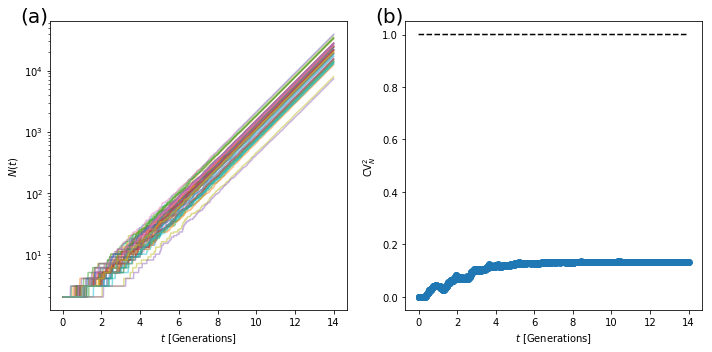

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
[ax1.semilogy(t[4:],n[4:],'-',alpha=0.5) for (t,n) in zip(T[:50],N[:50])];
ax1.set_xlabel(r"$t$ [Generations]")
ax1.set_ylabel(r"$N(t)$")
ax1.annotate('(a)', xy=(-0.1, 1.), xycoords="axes fraction",fontsize=20)


ax2.plot(T[0][:],var_N[:]/mean_N[:]**2,'o')
ax2.plot(T[0][:],np.ones(len(T[0][:])),'--',color='k')
ax2.set_xlabel(r"$t$ [Generations]")
ax2.set_ylabel(r"${\rm CV}^2_N$")
ax2.annotate('(b)', xy=(-0.1, 1.), xycoords="axes fraction",fontsize=20)


plt.tight_layout()